In [11]:
import numpy as np
import healpy as hp

import time
import os,sys
#import argparse
#import configparser

sys.path.append('/global/homes/s/shabbir/softwares/PiInTheSky/')
sys.path.append('/global/homes/s/shabbir/softwares/PiInTheSky/Fortran/')

import PiInTheSky.binnedEstimatorFullSky as binEstFullSky

In [20]:
sys.path.append('/global/homes/s/shabbir/softwares/PiInTheSky/PiInTheSky/')

In [12]:
import matplotlib.pyplot as plt

In [13]:
path_sims = '/pscratch/sd/s/shabbir/toy_model_bispectrum/maps/'

In [14]:
nside = 1024
map_elmax = 3*nside-1
elmax = 2002

delta_l = 200
elmin = 2
dell = delta_l
binEdges = np.arange(elmin, elmax + 1, dell)

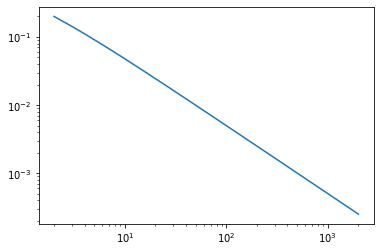

In [15]:
el = np.arange(0, elmax + 1, 1)
cls = np.zeros(elmax + 1)
cls[2:] = 1.0/(2*el[2:] + 1)
plt.loglog(el[2:], cls[2:])

In [16]:
!mkdir output
output_path = './output/'

mkdir: cannot create directory ‘output’: File exists


In [17]:
output_label = 'inv_ell_map'

In [18]:
Nrlzn = 4
for i in np.arange(0, Nrlzn, 1):
    seed = i+1
    print(seed)
    in_map_1 = hp.read_map(path_sims + 'map_of_inv_ell_Cls_lmax3071_nside1024_%d.fits'%(seed), field = (0,))
    map_alms_1 = hp.map2alm(maps = in_map_1, lmax=map_elmax, mmax=None, iter=3, pol=False)

    EST=binEstFullSky.binnedEstimator(invC=0, binSize = dell, ellMin=elmin, ellMax=elmax)

    bispec, covMat,_= EST.analyze(alms = [map_alms_1], beams = None, Cls = [[cls]], invCls = None, 
                                  mask = None, reCalNorm = 0, calcNorm=1)
    
    np.save(output_path + '%s_bispec_%d.npy'%(output_label, seed), bispec)
    np.save(output_path + '%s_covMat_%d.npy'%(output_label, seed), covMat)

1



 Order of input parameter maps matters.
   180450280          10    18045028
           1
   180450280          10    18045028
           1
   180210060          10    18021006
           1
2



 Order of input parameter maps matters.
   180450280          10    18045028
           1
   180450280          10    18045028
           1
   180210060          10    18021006
           1
3



 Order of input parameter maps matters.
   180450280          10    18045028
           1
   180450280          10    18045028
           1
   180210060          10    18021006
           1
4



 Order of input parameter maps matters.
   180450280          10    18045028
           1
   180450280          10    18045028
           1
   180210060          10    18021006
           1


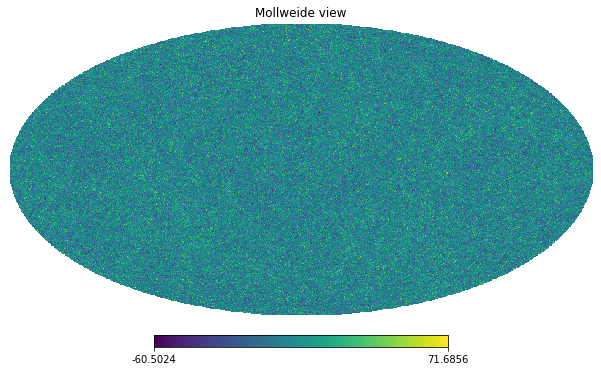

In [35]:
hp.mollview(in_map_1)

In [22]:
from scipy import stats

In [25]:
Nrlzn = 4
mean = np.ndarray(shape = (4))
std_dev = np.ndarray(shape = (4))
skewness = np.ndarray(shape = (4))
for i in np.arange(0, Nrlzn, 1):
    seed = i+1
    print(seed)
    in_map_1 = hp.read_map(path_sims + 'map_of_inv_ell_Cls_lmax3071_nside1024_%d.fits'%(seed), field = (0,))
    mean[i] = np.mean(in_map_1)
    std_dev[i] = np.std(in_map_1)
    skewness[i] = stats.skew(in_map_1)

1
2
3
4


In [26]:
print(mean, std_dev, skewness)

[ 2.51001882e-04 -2.38689445e-05  5.88213617e-04  2.24887583e-04] [13.82804585 13.81958294 13.82271481 13.81080437] [0.38582124 0.3867931  0.38655031 0.38754087]


In [34]:
skewness, std_dev

(array([0.38582124, 0.3867931 , 0.38655031, 0.38754087]),
 array([13.82804585, 13.81958294, 13.82271481, 13.81080437]))

In [40]:
omega_pix = hp.nside2pixarea(nside = 1024, degrees=False) #square radians

In [41]:
omega_pix

9.986854087797142e-07

In [42]:
bispectrum_amp = (skewness/omega_pix)*(omega_pix/std_dev**2)**(3./2)

In [43]:
bispectrum_amp

array([1.45820323e-07, 1.46456369e-07, 1.46264974e-07, 1.47019500e-07])

In [44]:
np.mean(bispectrum_amp)

1.4639029166615173e-07

In [48]:
#of the original pdf

def var_fs(sigma_0, alpha3):
    return sigma_0**2*(1 + 6*alpha3**2)

def skew_fs(sigma_0, alpha3):
    factor1 = (2.0*sigma_0**2)**(3/2.0)
    factor2 = np.sqrt(3*alpha3**2*(1 - alpha3**2))
    return factor1*factor2

In [49]:
variance_fs = var_fs(sigma_0=1.0, alpha3 = 0.2)
variance_fs

1.24

In [50]:
skewness_fs = skew_fs(sigma_0=1.0, alpha3 = 0.2)
skewness_fs

0.9600000000000001

In [51]:
bispectrum_amp = (skewness_fs/omega_pix)*(omega_pix/variance_fs)**(3./2)
bispectrum_amp

0.0006947891977802205